In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv('train.csv')
print (train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train= train.drop(columns=['Embarked'])
train= train.drop(columns=['Name'])
train= train.drop(columns=['Cabin'])

In [8]:


train.head()
# train.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,female,35.0,1,0,113803,53.1000
4,5,0,3,male,35.0,0,0,373450,8.0500


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
print(train.shape)

(891, 9)


In [11]:
# Working on missing values 
# Imputer   by this we filled up age cuz it had many null values , now it has no null values
from sklearn.impute import SimpleImputer
missingvalueimputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
x = train.iloc[:,4].values
x = x.reshape(-1,1)
train.iloc[:,4] = missingvalueimputer.fit_transform(x)
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [12]:
# next step is to convert string values to integers
# so we'will use encoder 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x= train.iloc[:,3].values
train.iloc[:,3] = labelencoder.fit_transform(x)
x=x.reshape(-1,1)
# male = 1 , female = 0
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,0,35.0,1,0,113803,53.1000
4,5,0,3,1,35.0,0,0,373450,8.0500


In [13]:
#  seperating dependent and independent variables 
train = train[['PassengerId','Survived','Pclass','Sex','Age','Parch','Fare']]
train.head(1)
x= train[['PassengerId','Pclass','Sex','Age','Parch','Fare']]
y= train[['Survived']]
x.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare
0,1,3,1,22.0,0,7.2500
1,2,1,0,38.0,0,71.2833
2,3,3,0,26.0,0,7.9250
3,4,1,0,35.0,0,53.1000
4,5,3,1,35.0,0,8.0500


In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train , Y_test = train_test_split(x,y,test_size=0.25)

ValueError: maximum supported dimension for an ndarray is 32, found 891

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)

# StandardScaler  for better optimiztion
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.transform(X_test)

# PCAScaler
from sklearn.decomposition import PCA
pca = PCA(n_components =2)              # Convert All the columns into two components/columns
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca =pca.transform(X_train_norm)
X_train_pca = pca.fit_transform(X_test_norm)
X_test_pca =pca.transform(X_test_norm)
pca.explained_variance_ratio_


array([0.30904637, 0.24020525])

0.8071748878923767
              precision    recall  f1-score   support

    survived       0.80      0.94      0.86       141
not survived       0.84      0.59      0.69        82

    accuracy                           0.81       223
   macro avg       0.82      0.76      0.78       223
weighted avg       0.81      0.81      0.80       223



c:\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


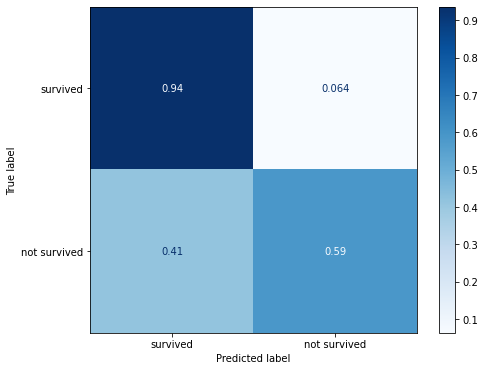

In [25]:
#KNN Algorithm MINMAX
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_min , Y_train)

prediction =knn.predict(X_test_min) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))   # Reshaping is done to convert the data alignment from horizontal to vertical as excel representation

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')


0.8026905829596412
              precision    recall  f1-score   support

    survived       0.79      0.90      0.84       131
not survived       0.82      0.66      0.73        92

    accuracy                           0.80       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.80      0.80       223



c:\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


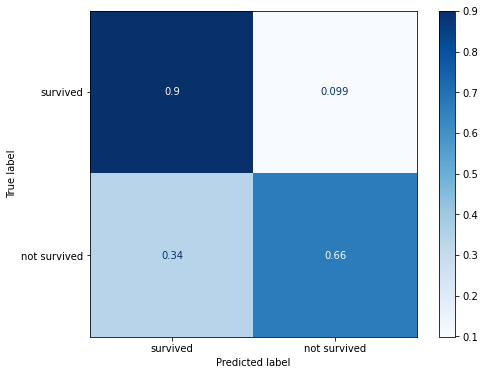

In [24]:
#KNN Algorithm PCA
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_pca , Y_test)

prediction =knn.predict(X_test_pca) 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))


cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')